In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [9]:
df['charges'].mean()

np.float64(13270.422265141257)

In [10]:
male = df[df['sex']=='male']
female = df[df['sex']=='female']
print('male candidate average',male['charges'].mean())
print('female candidate average',female['charges'].mean())


male candidate average 13956.751177721893
female candidate average 12569.578843835347


In [11]:
df2 = female[female['charges']<=female['charges'].mean()]
df2.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [12]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [13]:
df2['children'].value_counts()

children
0    187
1    115
2     78
3     48
4      7
5      6
Name: count, dtype: int64

In [14]:
df2['region'].value_counts()

region
southwest    120
northwest    113
southeast    112
northeast     96
Name: count, dtype: int64

In [15]:
## 18.5 ==> underweight
# 18.5 to 24 ==>Healthy weight
#25.0 to 29.9 ==>0verweight

In [16]:
df2['bmi']



5       25.74
6       33.44
7       27.74
13      39.82
16      30.78
        ...  
1331    33.40
1332    44.70
1334    31.92
1335    36.85
1336    25.80
Name: bmi, Length: 441, dtype: float64

In [17]:
ls = list(df['bmi'])
ls

[27.9,
 33.77,
 33.0,
 22.705,
 28.88,
 25.74,
 33.44,
 27.74,
 29.83,
 25.84,
 26.22,
 26.29,
 34.4,
 39.82,
 42.13,
 24.6,
 30.78,
 23.845,
 40.3,
 35.3,
 36.005,
 32.4,
 34.1,
 31.92,
 28.025,
 27.72,
 23.085,
 32.775,
 17.385,
 36.3,
 35.6,
 26.315,
 28.6,
 28.31,
 36.4,
 20.425,
 32.965,
 20.8,
 36.67,
 39.9,
 26.6,
 36.63,
 21.78,
 30.8,
 37.05,
 37.3,
 38.665,
 34.77,
 24.53,
 35.2,
 35.625,
 33.63,
 28.0,
 34.43,
 28.69,
 36.955,
 31.825,
 31.68,
 22.88,
 37.335,
 27.36,
 33.66,
 24.7,
 25.935,
 22.42,
 28.9,
 39.1,
 26.315,
 36.19,
 23.98,
 24.75,
 28.5,
 28.1,
 32.01,
 27.4,
 34.01,
 29.59,
 35.53,
 39.805,
 32.965,
 26.885,
 38.285,
 37.62,
 41.23,
 34.8,
 22.895,
 31.16,
 27.2,
 27.74,
 26.98,
 39.49,
 24.795,
 29.83,
 34.77,
 31.3,
 37.62,
 30.8,
 38.28,
 19.95,
 19.3,
 31.6,
 25.46,
 30.115,
 29.92,
 27.5,
 28.025,
 28.4,
 30.875,
 27.94,
 35.09,
 33.63,
 29.7,
 30.8,
 35.72,
 32.205,
 28.595,
 49.06,
 27.94,
 27.17,
 23.37,
 37.1,
 23.75,
 28.975,
 31.35,
 33.915,
 28.78

In [18]:
label =[]
for i in ls:
    if i<18.5:
        label.append('underweight')
    elif i>18.5 and i <24.9:
        label.append('healthyweight')
    elif i>25.0 and i<29.9:
        label.append("overweight")
    else:
        label.append('obese')

In [19]:
len(label)

1338

In [20]:
df.shape

(1338, 7)

In [21]:
df['health_category']=label

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [23]:
df['health_category'].value_counts()

health_category
obese            725
overweight       372
healthyweight    221
underweight       20
Name: count, dtype: int64

In [24]:
health_group = df.groupby('health_category')

In [25]:
health_group[['charges']].mean()

,charges
health_category,
healthyweight,10404.900084
obese,15420.399577
overweight,11020.183782
underweight,8852.200585


In [26]:
health_analysis = health_group['charges'].agg(min_charges = 'min',max_charges='max',mean_charges='mean')

In [27]:
health_analysis.sort_values('mean_charges')

,min_charges,max_charges,mean_charges
health_category,,,
underweight,1621.3402,32734.18630,8852.200585
healthyweight,1121.8739,35069.37452,10404.900084
overweight,1252.4070,38245.59327,11020.183782
obese,1131.5066,63770.42801,15420.399577


In [28]:
Health_classes = list(health_analysis.index)

In [29]:
average_charges = (health_analysis['mean_charges'].values)

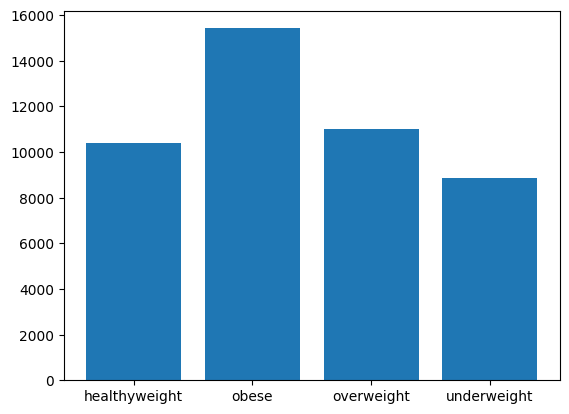

In [30]:
plt.bar(Health_classes,average_charges)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

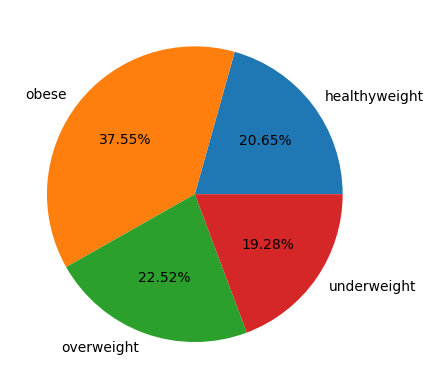

In [31]:
avg = list(health_analysis['max_charges'].values)
classes = list(health_analysis['max_charges'].index)
plt.pie(avg,labels=classes,autopct="%.2f%%")
plt.show


In [32]:
region_group = df.groupby('region')

In [33]:
df

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [34]:
region_group[['charges']].mean()

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [35]:
region_analysis = region_group['charges'].agg(min_charges = 'min',max_charges='max',mean_charges='mean')

In [36]:
region_analysis.sort_values('mean_charges')

,min_charges,max_charges,mean_charges
region,,,
southwest,1241.5650,52590.82939,12346.937377
northwest,1621.3402,60021.39897,12417.575374
northeast,1694.7964,58571.07448,13406.384516
southeast,1121.8739,63770.42801,14735.411438


In [37]:
region_classes = list(region_analysis.index)

In [38]:
average_charges = (region_analysis['mean_charges'].values)

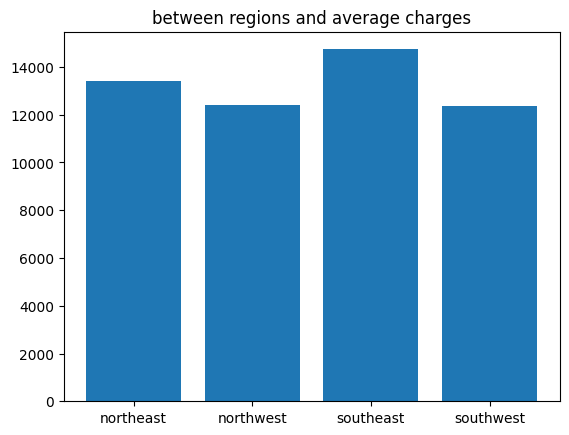

In [39]:
plt.bar(region_classes,average_charges)
plt.title("between regions and average charges")
plt.show()

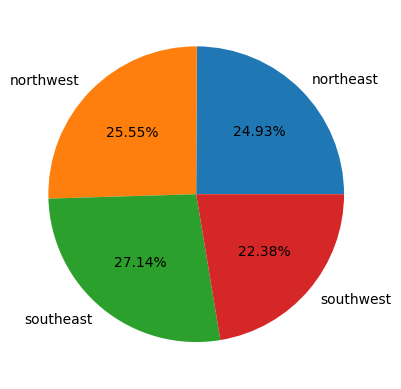

In [40]:
avg = (region_analysis['max_charges'].values)
classes = (region_analysis['max_charges'].index)
plt.pie(avg,labels=classes,autopct='%.2f%%')
plt.show()

In [41]:
average_charges2 = (region_analysis['max_charges'].values)

In [42]:
classes2 = list(region_analysis.index)

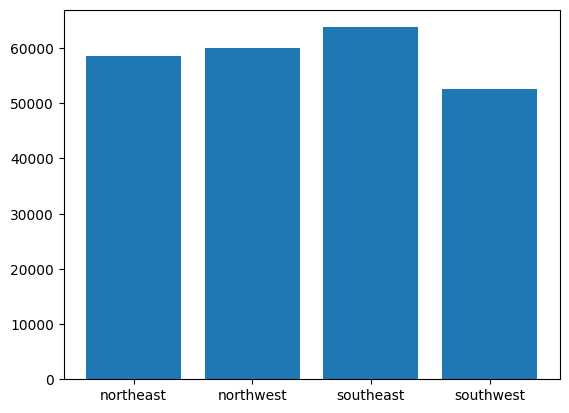

In [43]:
plt.bar(classes2,average_charges2)
plt.show()

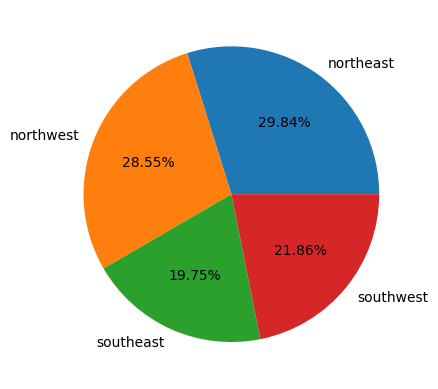

In [44]:
avg =(region_analysis['min_charges'].values)
classes=(region_analysis['min_charges'].index)
plt.pie(avg,labels=classes,autopct="%.2f%%")
plt.show()

In [45]:
sex_group = df.groupby('sex')

In [46]:
sex_group[['charges']].mean()

,charges
sex,
female,12569.578844
male,13956.751178


In [47]:
sex_analysis = sex_group['charges'].agg(min_charges='min',max_charges='max',mean_charges='mean')

In [48]:
sex_analysis.sort_values('mean_charges')

,min_charges,max_charges,mean_charges
sex,,,
female,1607.5101,63770.42801,12569.578844
male,1121.8739,62592.87309,13956.751178


In [49]:
sex_classes = list(sex_analysis.index)

In [50]:
average_charges = (sex_analysis['min_charges'].values)

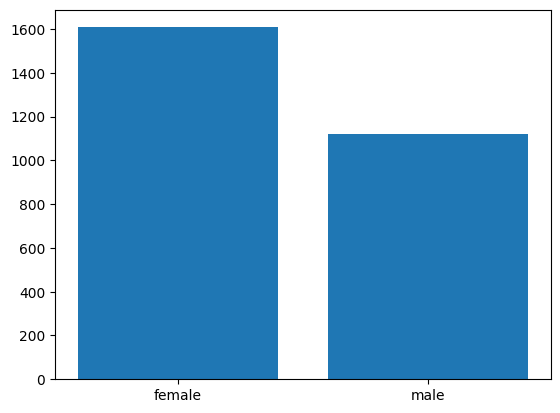

In [51]:
plt.bar(sex_classes,average_charges)
plt.show()

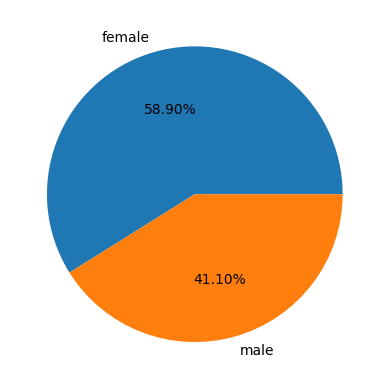

In [52]:
avg = (sex_analysis['min_charges'].values)
avg_classes=(sex_analysis['min_charges'].index)
plt.pie(avg,labels=avg_classes,autopct='%.2f%%')
plt.show()

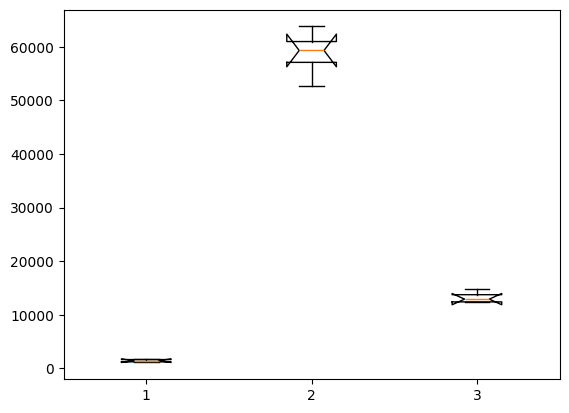

In [53]:
plt.boxplot(region_analysis,region_classes)
plt.show()

In [54]:
df

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthyweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [55]:
dt ={'female':0,'male':1}
smoker_dict={'yes':1,'no':0}
df['smoker']= df['smoker'].map(smoker_dict)
df['sex']= df['sex'].map(dt)

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,overweight
1,18,1,33.770,1,0,southeast,1725.55230,obese
2,28,1,33.000,3,0,southeast,4449.46200,obese
3,33,1,22.705,0,0,northwest,21984.47061,healthyweight
4,32,1,28.880,0,0,northwest,3866.85520,overweight


In [57]:
df.health_category.value_counts()

health_category
obese            725
overweight       372
healthyweight    221
underweight       20
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

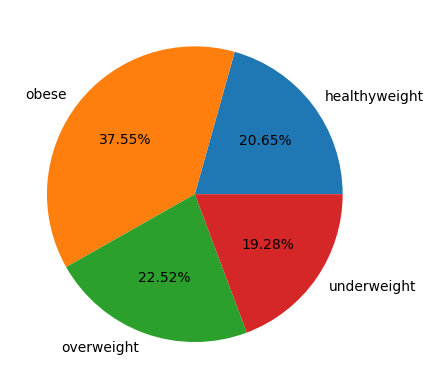

In [58]:
health= list(health_analysis['max_charges'].values)
classes = list(health_analysis['max_charges'].index)
plt.pie(health,labels=classes,autopct="%.2f%%")
plt.show


In [59]:
df['health_category'].value_counts()

health_category
obese            725
overweight       372
healthyweight    221
underweight       20
Name: count, dtype: int64

In [60]:
health_category_dict = {'underweight':1,'healthyweight':2,'overweight':3,'obese':4}
df['health_category'] = df['health_category'].map(health_category_dict)

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [62]:
#onehot encoding representation
final_data = pd.get_dummies(df).astype(int)
final_data.head()

,age,sex,bmi,children,smoker,charges,health_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [63]:
# x and y split
#charges =y
#and other variables are x

In [64]:
x = final_data.drop('charges',axis='columns')
y= final_data[['charges']]

In [65]:
###training and testing split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train  ,x_test,y_train, y_test=train_test_split(x,y,test_size=0.8)

In [68]:
###Model training
#Regression
#1.linear Regression
#2.Decision tree
#.Random Forest

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [72]:
# object creation
lnr =LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
# i am going with default parameters

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
##model training
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
print("Training score by linear: ",lnr.score(x_train,y_train)*100)
print("Training score by decision tree: ",dtr.score(x_train,y_train)*100)
print("Training score by Random forest: ",rfr.score(x_train,y_train)*100)

Training score by linear:  76.00062201580774
Training score by decision tree:  99.78176321125008
Training score by Random forest:  97.24173609319602


In [76]:
print("Testing score by linear: ",lnr.score(x_test,y_test)*100)
print("Testing score by decision tree: ",dtr.score(x_test,y_test)*100)
print("Testing score by Random forest: ",rfr.score(x_test,y_test)*100)

Testing score by linear:  74.54598922770815
Testing score by decision tree:  71.99664423516737
Testing score by Random forest:  84.24935497825015


In [77]:
###prediction
linear =lnr.predict(x_test)
decisionTree= dtr.predict(x_test)
randomForest = rfr.predict(x_test)

In [78]:
x_test

,age,sex,bmi,children,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest
394,46,0,32,2,0,4,1,0,0,0
210,20,1,33,1,0,4,0,0,0,1
1322,62,1,38,0,0,4,0,0,1,0
8,37,1,29,2,0,3,1,0,0,0
276,19,1,20,2,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1121,46,1,38,2,0,4,0,0,1,0
441,33,0,33,0,1,4,0,0,0,1
362,19,0,21,0,1,2,0,0,0,1
212,24,1,28,2,0,3,0,1,0,0


In [79]:
y_test

,charges
394,9411
210,1980
1322,12981
8,6406
276,2803
...,...
1121,8347
441,37079
362,13844
212,3537


In [80]:
comparision_df = pd.concat([x_test,y_test],axis=1)
comparision_df

,age,sex,bmi,children,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges
394,46,0,32,2,0,4,1,0,0,0,9411
210,20,1,33,1,0,4,0,0,0,1,1980
1322,62,1,38,0,0,4,0,0,1,0,12981
8,37,1,29,2,0,3,1,0,0,0,6406
276,19,1,20,2,0,2,0,1,0,0,2803
...,...,...,...,...,...,...,...,...,...,...,...
1121,46,1,38,2,0,4,0,0,1,0,8347
441,33,0,33,0,1,4,0,0,0,1,37079
362,19,0,21,0,1,2,0,0,0,1,13844
212,24,1,28,2,0,3,0,1,0,0,3537


In [81]:
comparision_df['linear_pr']=linear

In [82]:
comparision_df['decision_pr']=decisionTree

In [83]:
comparision_df['random_pr']=randomForest

In [84]:
comparision_df

,age,sex,bmi,children,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges,linear_pr,decision_pr,random_pr
394,46,0,32,2,0,4,1,0,0,0,9411,12116.992724,8569.0,9412.79
210,20,1,33,1,0,4,0,0,0,1,1980,4073.066151,27724.0,12155.85
1322,62,1,38,0,0,4,0,0,1,0,12981,15404.389334,12982.0,14316.69
8,37,1,29,2,0,3,1,0,0,0,6406,7916.496796,6548.0,9570.37
276,19,1,20,2,0,2,0,1,0,0,2803,1131.981020,2775.0,12175.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,46,1,38,2,0,4,0,0,1,0,8347,13231.136305,8413.0,8557.39
441,33,0,33,0,1,4,0,0,0,1,37079,30473.586432,37742.0,38630.82
362,19,0,21,0,1,2,0,0,0,1,13844,23155.448405,20167.0,18286.26
212,24,1,28,2,0,3,0,1,0,0,3537,4759.058004,22493.0,7439.13


In [85]:
comparision_df.to_csv('prediction.csv',index=False)

In [86]:
#hyper parameter turning ---> to obtained highest accuracy

In [87]:
final_data

,age,sex,bmi,children,smoker,charges,health_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,4,0,1,0,0
1334,18,0,31,0,0,2205,4,1,0,0,0
1335,18,0,36,0,0,1629,4,0,0,1,0
1336,21,0,25,0,0,2007,3,0,0,0,1


In [88]:
import joblib,os

In [ ]:
# saving the model  


In [96]:
os.makedirs('models',exist_ok=True)
joblib.dump(lnr,'./models/linear_model.lb')
joblib.dump(dtr,'./models/decisionTree.lb')
joblib.dump(rfr,'./models/randomForest.lb')

['./models/randomForest.lb']

In [99]:
x_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'health_category',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')